In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruits.txt')
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [2]:
fruits.shape

(59, 7)

In [3]:
loockup_fruite_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
loockup_fruite_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

*Create train-test split*

In [4]:
X = fruits[['mass','width','height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test, = train_test_split(X, y, random_state=0)

<IPython.core.display.Javascript object>


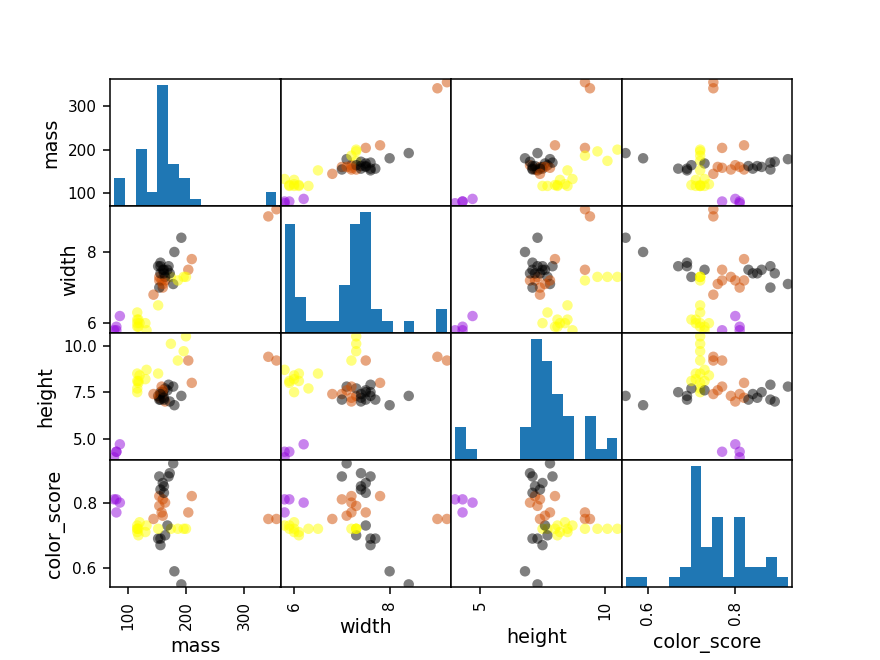

/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


In [17]:
#2d scatter plot
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s=30, 
                                     hist_kwds={'bins' : 15},cmap=cmap)

<ipython-input-20-3e332df80186>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['color_score'] = fruits['color_score']


<IPython.core.display.Javascript object>


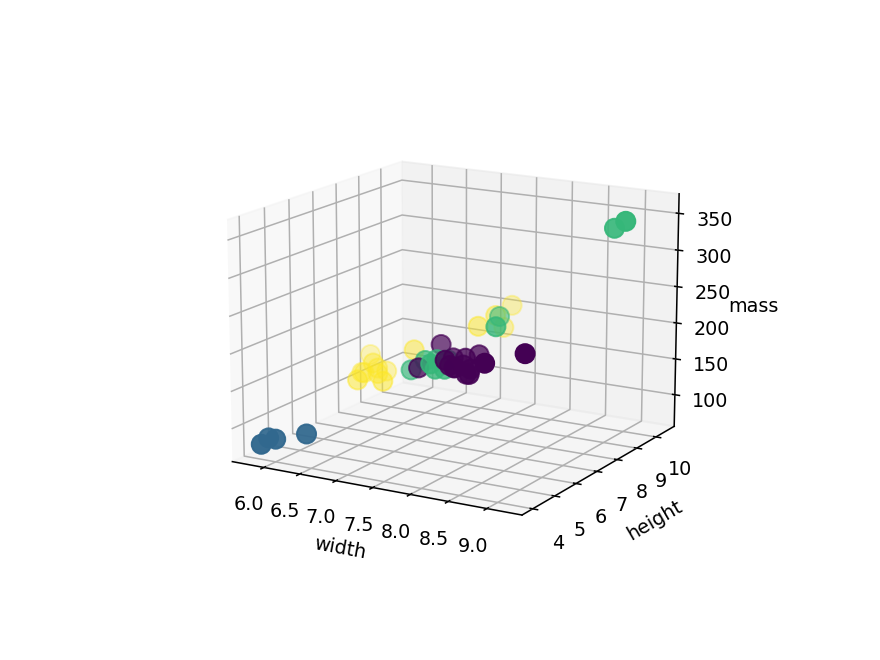

In [20]:
#3D scatter plot

from mpl_toolkits.mplot3d import Axes3D
X_train['color_score'] = fruits['color_score']

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'],X_train['height'],X_train['mass'],c=y_train, marker='o',s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('mass')
plt.show()

In [7]:
# A Simple Classification Task
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruits.txt')

In [8]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [9]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [10]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,
                           n_neighbors=5,p=2,weights='uniform')

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=1)

In [13]:
knn.score(X_test,y_test)

0.5333333333333333

In [14]:
fruit_prediction = knn.predict([[80, 10.5, 5.5, 4.3]]) 
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

<IPython.core.display.Javascript object>


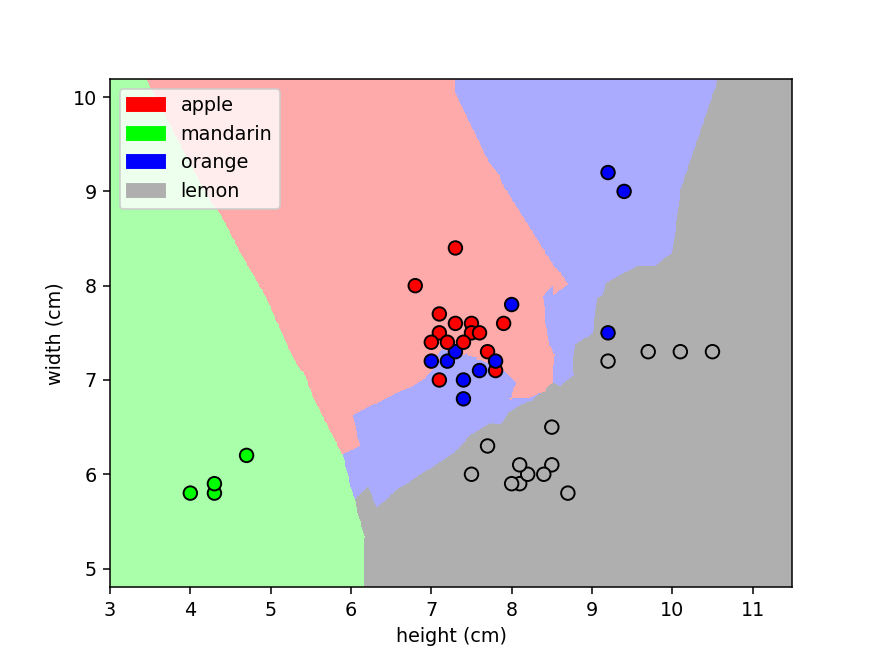

/home/mujassim/DataScience/FruitClassification/adspy_shared_utilities.py:197: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


In [15]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train, y_train, 5, 'uniform')

<IPython.core.display.Javascript object>


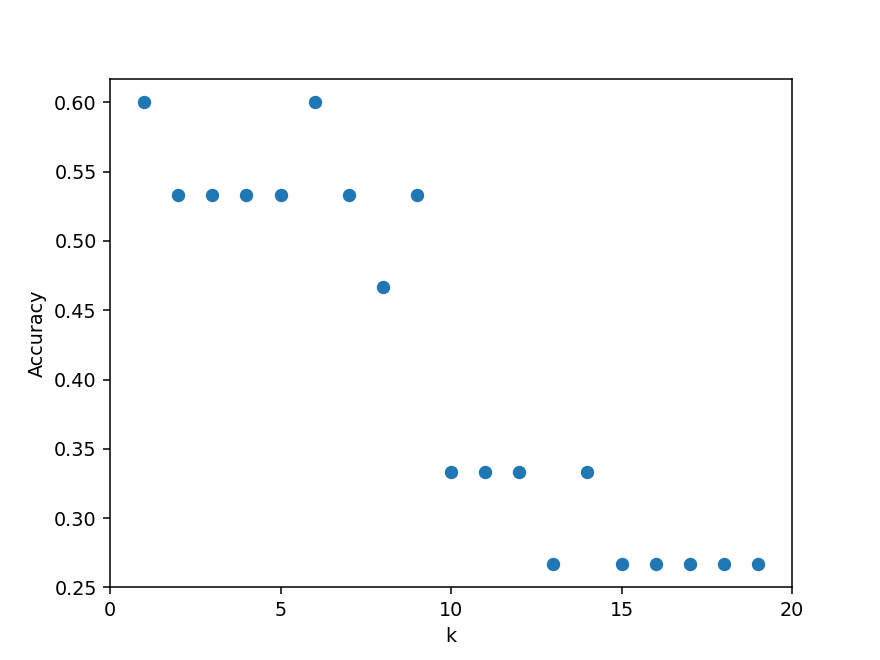

In [16]:
#How sensitive is k-NN classification accuracy to the choice of the 'k' parameter
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,20)
scores=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()